In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statistics as st
import plotly as px
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import pickle







In [208]:
# reading the csv file for 2000-2012
df1 = pd.read_csv(r'C:\Users\Happy\Desktop\Naren Baskar\singapore resaleflat prices\ResaleFlatPricesBasedonApprovalDate2000Feb2012 (1).csv')
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [209]:
# reading the csv file for 1990-1999
df2 = pd.read_csv(r'C:\Users\Happy\Desktop\Naren Baskar\singapore resaleflat prices\ResaleFlatPricesBasedonApprovalDate19901999 (1).csv')
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [210]:
# reading the csv file for 2015-2016
df3 = pd.read_csv(r'C:\Users\Happy\Desktop\Naren Baskar\singapore resaleflat prices\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv')
df3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [211]:
# reading the csv file for 2017 onwards
df4 = pd.read_csv(r'C:\Users\Happy\Desktop\Naren Baskar\singapore resaleflat prices\ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv')
df4.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0


In [212]:
# reading the csv file for 2012-2014 onwards
df5 = pd.read_csv(r'C:\Users\Happy\Desktop\Naren Baskar\singapore resaleflat prices\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014 (1).csv')
df5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [213]:
# here we can preoprocessing the future year so we can concat the 2015-2016 and 2017 onwards
# here we cant take 2012-2014 because there one remaining lease column is missing

df6 = pd.concat([df3,df4],axis=0) 
df6.reset_index(drop=True,inplace=True)
df6.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [214]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226001 entries, 0 to 226000
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                226001 non-null  object 
 1   town                 226001 non-null  object 
 2   flat_type            226001 non-null  object 
 3   block                226001 non-null  object 
 4   street_name          226001 non-null  object 
 5   storey_range         226001 non-null  object 
 6   floor_area_sqm       226001 non-null  float64
 7   flat_model           226001 non-null  object 
 8   lease_commence_date  226001 non-null  int64  
 9   remaining_lease      226001 non-null  object 
 10  resale_price         226001 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.0+ MB


In [215]:
# checking datatypes
df6.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [216]:
# checking null values
df6.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [217]:
df6.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0


In [218]:
# here we can create address column by the combine of street name and block
df6['address'] = df6['block']+" "+df6['street_name']

In [219]:
df6.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [220]:
# removing  block and street_name
df6.drop(columns=['block','street_name'],inplace=True)

In [221]:
df6.columns

Index(['month', 'town', 'flat_type', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'remaining_lease', 'resale_price',
       'address'],
      dtype='object')

In [222]:
df6.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10
2,2015-01,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4
3,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10
4,2015-01,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10


In [223]:
df6.dtypes

month                   object
town                    object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
address                 object
dtype: object

In [224]:
df6['month'] = pd.to_datetime(df6['month'], format='%Y-%m', errors='coerce')  # Convert to datetime
df6['year'] = df6['month'].dt.year
df6['month'] = df6['month'].dt.month


In [225]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (if needed)


In [226]:
# checking unique values in columns

for i in df6.columns:
    print(f"Unique values in column '{i}':")
    print(df6[i].unique())
    print()  

Unique values in column 'month':
[ 1  2  3  4  5  6  7  8  9 10 11 12]

Unique values in column 'town':
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']

Unique values in column 'flat_type':
['3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']

Unique values in column 'storey_range':
['07 TO 09' '01 TO 03' '13 TO 15' '10 TO 12' '04 TO 06' '19 TO 21'
 '16 TO 18' '22 TO 24' '25 TO 27' '28 TO 30' '34 TO 36' '46 TO 48'
 '31 TO 33' '37 TO 39' '43 TO 45' '40 TO 42' '49 TO 51']

Unique values in column 'floor_area_sqm':
[ 60.   68.   69.   67.   74.   82.   73.   75.   92.   91.   93.   97.
  98.   99.  125.  121.  138.  119.  123.  110.  111.   45.   44.   59.
  65.   70.   81.   83.   84

In [227]:
df6.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [228]:
# seperating storey_range values
df6[['storey_start','storey_end']] = df6['storey_range'].str.split('TO',expand=True) 

In [229]:
df6.head(1)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09


In [230]:
# droping the storey_range values
df6.drop(columns=['storey_range'],inplace=True)

In [231]:
df6.head(1)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,ANG MO KIO,3 ROOM,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09


In [232]:
df6.dtypes

month                    int32
town                    object
flat_type               object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
address                 object
year                     int32
storey_start            object
storey_end              object
dtype: object

In [233]:
# storey_start and storey_end are in object , so we want to convert to int 
df6['storey_start'] = df6['storey_start'].astype(int)
df6['storey_end'] = df6['storey_end'].astype(int)

In [234]:
df6.dtypes

month                    int32
town                    object
flat_type               object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
address                 object
year                     int32
storey_start             int64
storey_end               int64
dtype: object

In [235]:


# Initialize lists to store years and months
years_list = []
months_list = []

# Process each entry in 'remaining_lease'
for lease_str in df6['remaining_lease'].astype(str):
    # Remove unwanted substrings and extra spaces
    cleaned_str = lease_str.replace("years", "").replace("months", "").replace("month", "").strip()
    
    # Split the cleaned string by whitespace
    parts = cleaned_str.split()
    
    # Initialize default values for years and months
    years = 0
    months = 0
    
    # Process parts to determine years and months
    if len(parts) == 1:
        # Only one part present
        if 'years' in lease_str:  # Check if 'years' was in the original string
            years = int(parts[0])
        else:  # If 'months' was in the original string
            months = int(parts[0])
    elif len(parts) == 2:
        # Two parts present
        years = int(parts[0])
        months = int(parts[1])
    
    # Append the extracted years and months to the lists
    years_list.append(years)
    months_list.append(months)

# Create a DataFrame from the lists
df_sliced = pd.DataFrame({
    'remaining_lease_year': years_list,
    'remaining_lease_month': months_list
})




In [236]:
df_sliced.tail(10)

,remaining_lease_year,remaining_lease_month
225991,59,7
225992,59,5
225993,90,7
225994,62,3
225995,62,2
225996,90,2
225997,90,2
225998,62,7
225999,59,7
226000,62,3


In [237]:
# Convert remaining_lease_year to integers
df_sliced['remaining_lease_year'] = df_sliced['remaining_lease_year'].fillna(0).astype(int)

# Convert remaining_lease_month to integers after filling NaN
df_sliced['remaining_lease_month'] = df_sliced['remaining_lease_month'].fillna(0).astype(int)

In [238]:
df_sliced.isnull().sum()

remaining_lease_year     0
remaining_lease_month    0
dtype: int64

In [239]:
# concat
df7 = pd.concat([df_sliced,df6],axis=1)

In [240]:
df7.tail(5)

,remaining_lease_year,remaining_lease_month,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
225996,90,2,9,YISHUN,5 ROOM,112.0,Improved,2015,90 years 02 months,610000.0,432C YISHUN AVE 1,2024,1,3
225997,90,2,9,YISHUN,5 ROOM,112.0,Improved,2015,90 years 02 months,730000.0,317A YISHUN AVE 9,2024,7,9
225998,62,7,9,YISHUN,5 ROOM,122.0,Improved,1988,62 years 07 months,660000.0,305 YISHUN CTRL,2024,10,12
225999,59,7,9,YISHUN,5 ROOM,121.0,Improved,1985,59 years 07 months,630000.0,149 YISHUN ST 11,2024,7,9
226000,62,3,9,YISHUN,EXECUTIVE,146.0,Maisonette,1987,62 years 03 months,893888.0,824 YISHUN ST 81,2024,1,3


In [241]:
# droping the remaining_lease columns

df7.drop(columns=['remaining_lease'],inplace=True)

In [242]:
df7.tail()

,remaining_lease_year,remaining_lease_month,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end
225996,90,2,9,YISHUN,5 ROOM,112.0,Improved,2015,610000.0,432C YISHUN AVE 1,2024,1,3
225997,90,2,9,YISHUN,5 ROOM,112.0,Improved,2015,730000.0,317A YISHUN AVE 9,2024,7,9
225998,62,7,9,YISHUN,5 ROOM,122.0,Improved,1988,660000.0,305 YISHUN CTRL,2024,10,12
225999,59,7,9,YISHUN,5 ROOM,121.0,Improved,1985,630000.0,149 YISHUN ST 11,2024,7,9
226000,62,3,9,YISHUN,EXECUTIVE,146.0,Maisonette,1987,893888.0,824 YISHUN ST 81,2024,1,3


In [243]:
# Encoding the categorical columns
# label Encoding
df7['town'] = LabelEncoder().fit_transform(df7['town'])
df7['address'] = LabelEncoder().fit_transform(df7['address'])
# ordinal Encoding
df7['flat_type'] = OrdinalEncoder().fit_transform(df7[['flat_type']])
df7['flat_model'] = OrdinalEncoder().fit_transform(df7[['flat_model']])


In [244]:
df7.head(5)

,remaining_lease_year,remaining_lease_month,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end
0,0,70,1,0,2.0,60.0,5.0,1986,255000.0,1639,2015,7,9
1,0,65,1,0,2.0,68.0,12.0,1981,275000.0,6603,2015,1,3
2,0,64,1,0,2.0,69.0,12.0,1980,285000.0,1470,2015,1,3
3,0,63,1,0,2.0,68.0,12.0,1979,290000.0,5439,2015,1,3
4,0,64,1,0,2.0,68.0,12.0,1980,290000.0,6757,2015,7,9


In [245]:
df7.dtypes

remaining_lease_year       int64
remaining_lease_month      int64
month                      int32
town                       int64
flat_type                float64
floor_area_sqm           float64
flat_model               float64
lease_commence_date        int64
resale_price             float64
address                    int64
year                       int32
storey_start               int64
storey_end                 int64
dtype: object

In [246]:
df7.columns

Index(['remaining_lease_year', 'remaining_lease_month', 'month', 'town',
       'flat_type', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'address', 'year', 'storey_start', 'storey_end'],
      dtype='object')

In [247]:
df7 = df7[['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month']]

In [248]:
df7.sort_values(by=['month','year'],inplace=True)

In [249]:
df7.to_csv("Singapore_resales.csv",index=False)

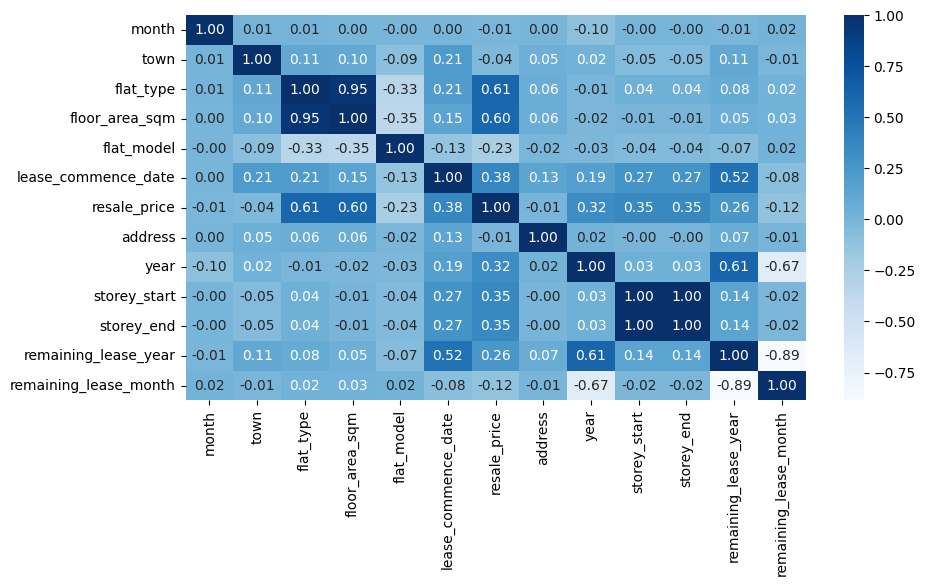

In [250]:
# correaltion and heatmap
df7_corr= df7.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df7_corr,annot=True,cmap="Blues",fmt="0.2f")
plt.show()

In [251]:
df_final = pd.read_csv(r"C:\Users\Happy\Desktop\Naren Baskar\singapore resaleflat prices\Singapore_resales.csv")

In [252]:
df_final.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,1,0,2.0,60.0,5.0,1986,255000.0,1639,2015,7,9,0,70
1,1,0,2.0,68.0,12.0,1981,275000.0,6603,2015,1,3,0,65
2,1,0,2.0,69.0,12.0,1980,285000.0,1470,2015,1,3,0,64
3,1,0,2.0,68.0,12.0,1979,290000.0,5439,2015,1,3,0,63
4,1,0,2.0,68.0,12.0,1980,290000.0,6757,2015,7,9,0,64


In [253]:
# checking duplicates
df_final.duplicated().sum()

np.int64(315)

In [254]:
df1_final = df_final.drop_duplicates()
df1_final.reset_index(drop=True,inplace=True)

In [255]:
# here month and address column  have zero correlatio so we want to drop them
df1_final.drop(columns=['address','month'],inplace=True)

In [256]:
df1_final.tail()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
225681,25,5.0,146.0,7.0,1987,838000.0,2023,10,12,62,10
225682,25,5.0,142.0,3.0,1987,755000.0,2023,10,12,62,10
225683,25,5.0,142.0,3.0,1988,780000.0,2023,1,3,63,2
225684,25,5.0,142.0,3.0,1988,785000.0,2023,1,3,63,2
225685,25,6.0,179.0,11.0,1987,975000.0,2023,1,3,63,1


In [257]:

def plot(df, column):
    plt.figure(figsize=(18, 6))

    # Distribution Plot
    plt.subplot(1, 3, 1)
    sns.distplot(df[column])
    plt.title(f"Distplot for {column}")

    # Histogram Plot
    plt.subplot(1, 3, 2)
    sns.histplot(df[column], kde=True, bins=30, color="salmon")
    plt.title(f"Histogram Plot for {column}")

    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[column], color="salmon")
    plt.title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

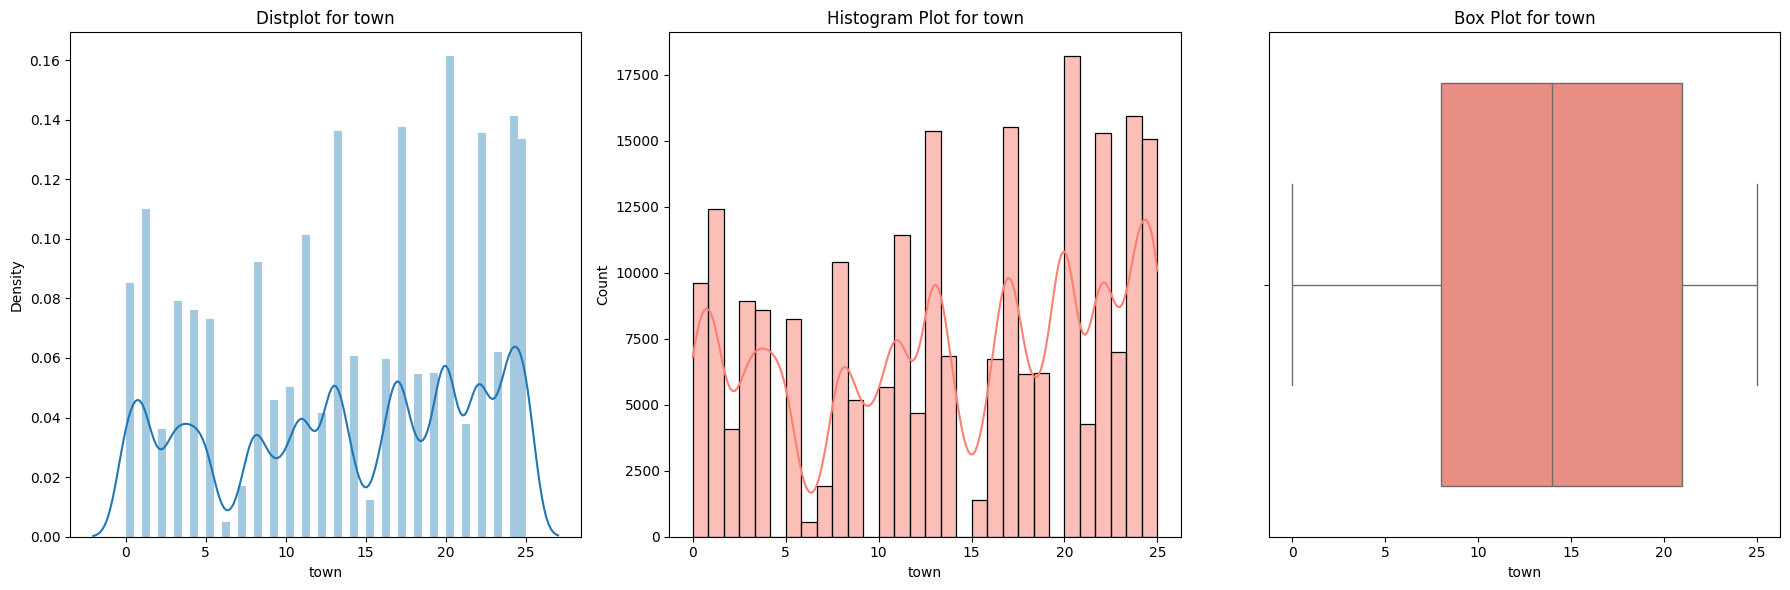

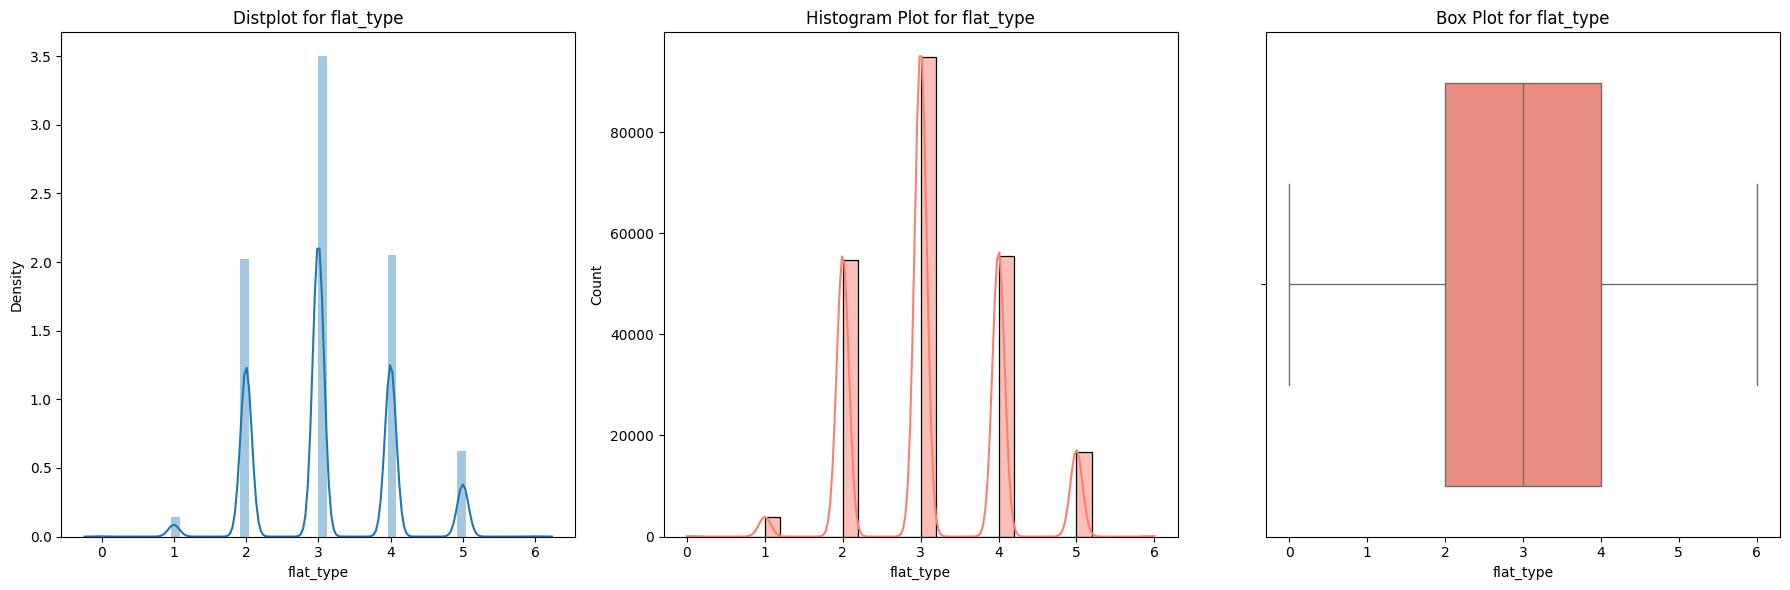

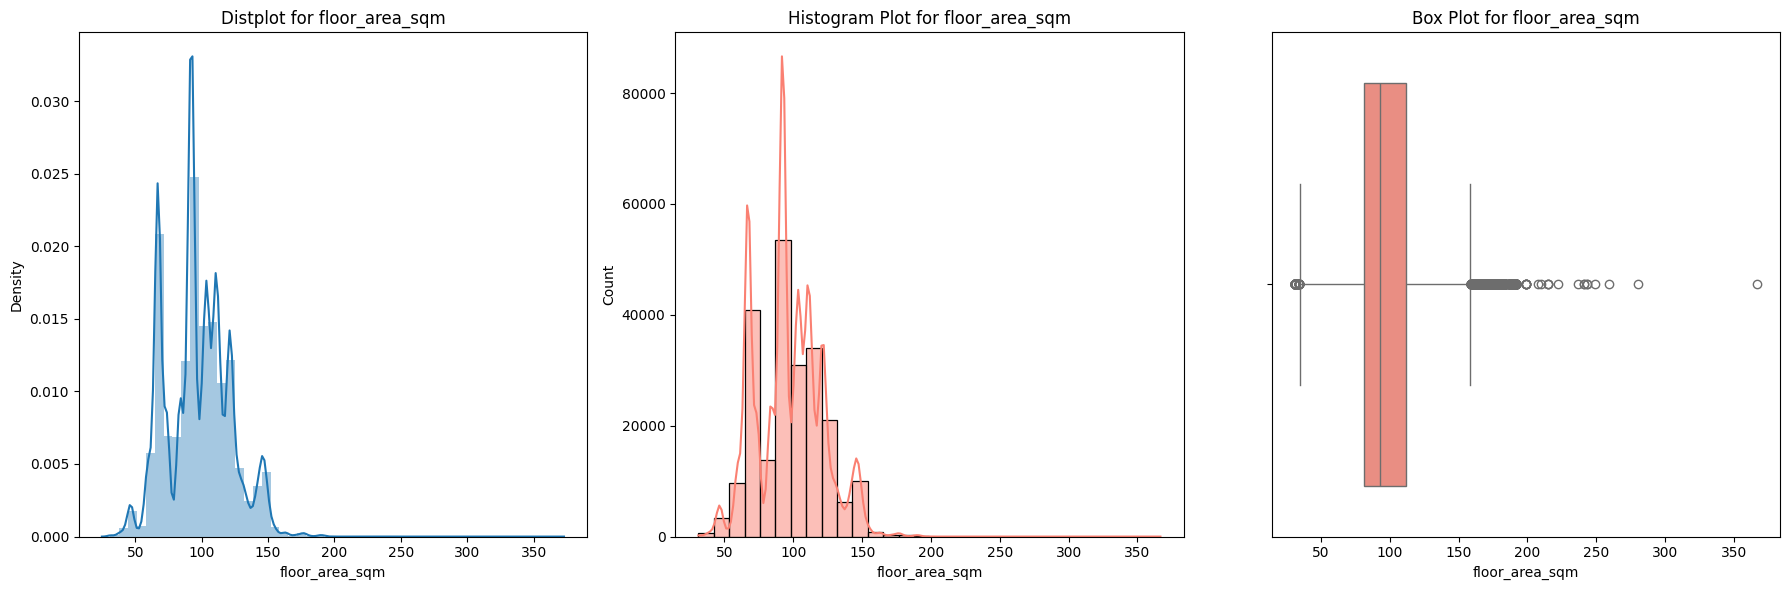

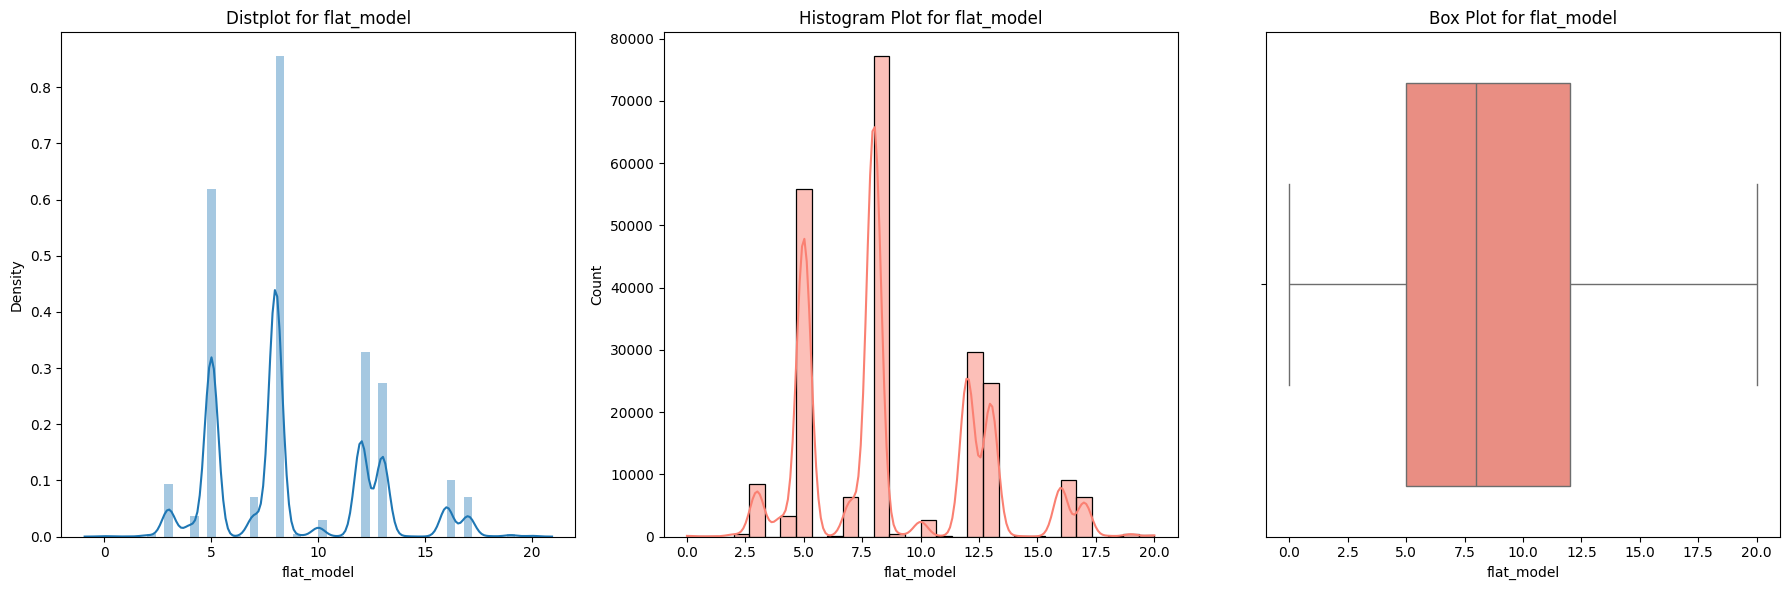

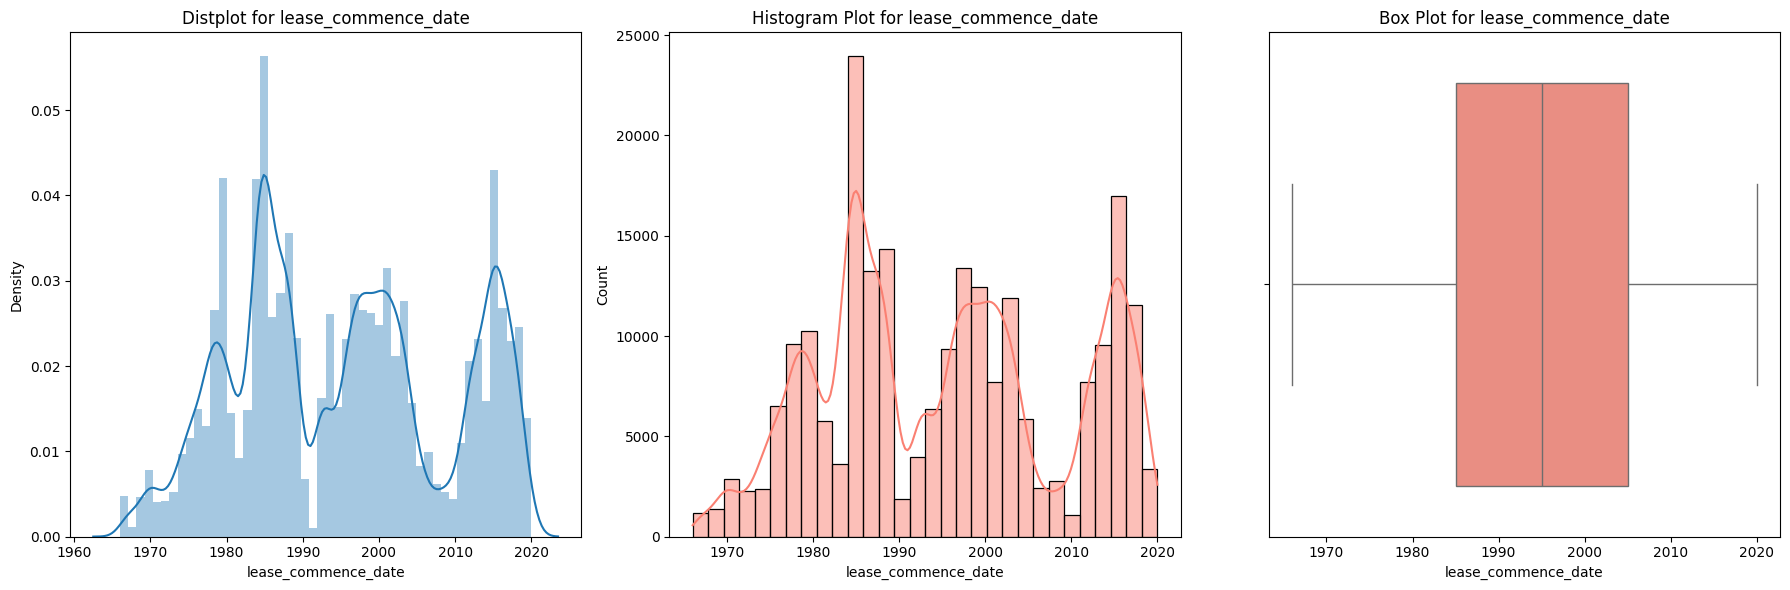

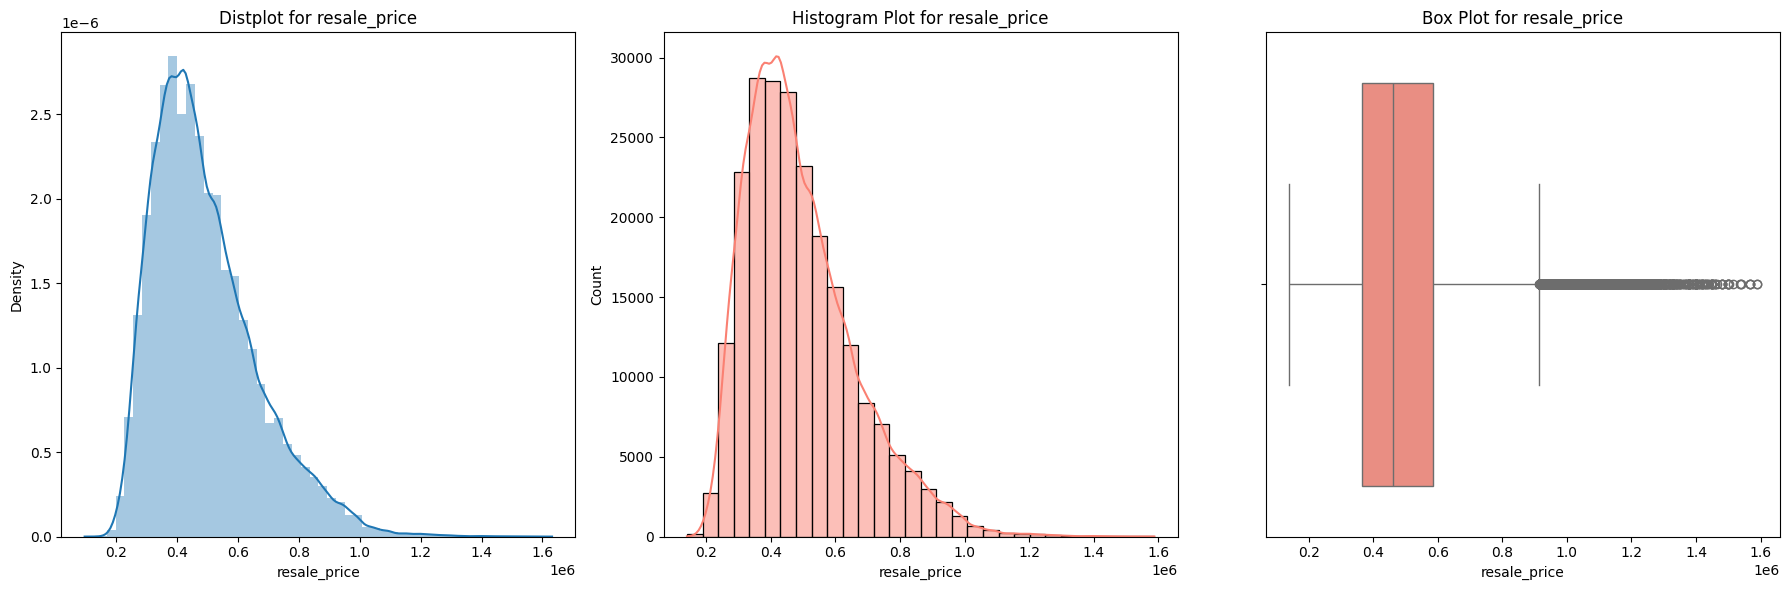

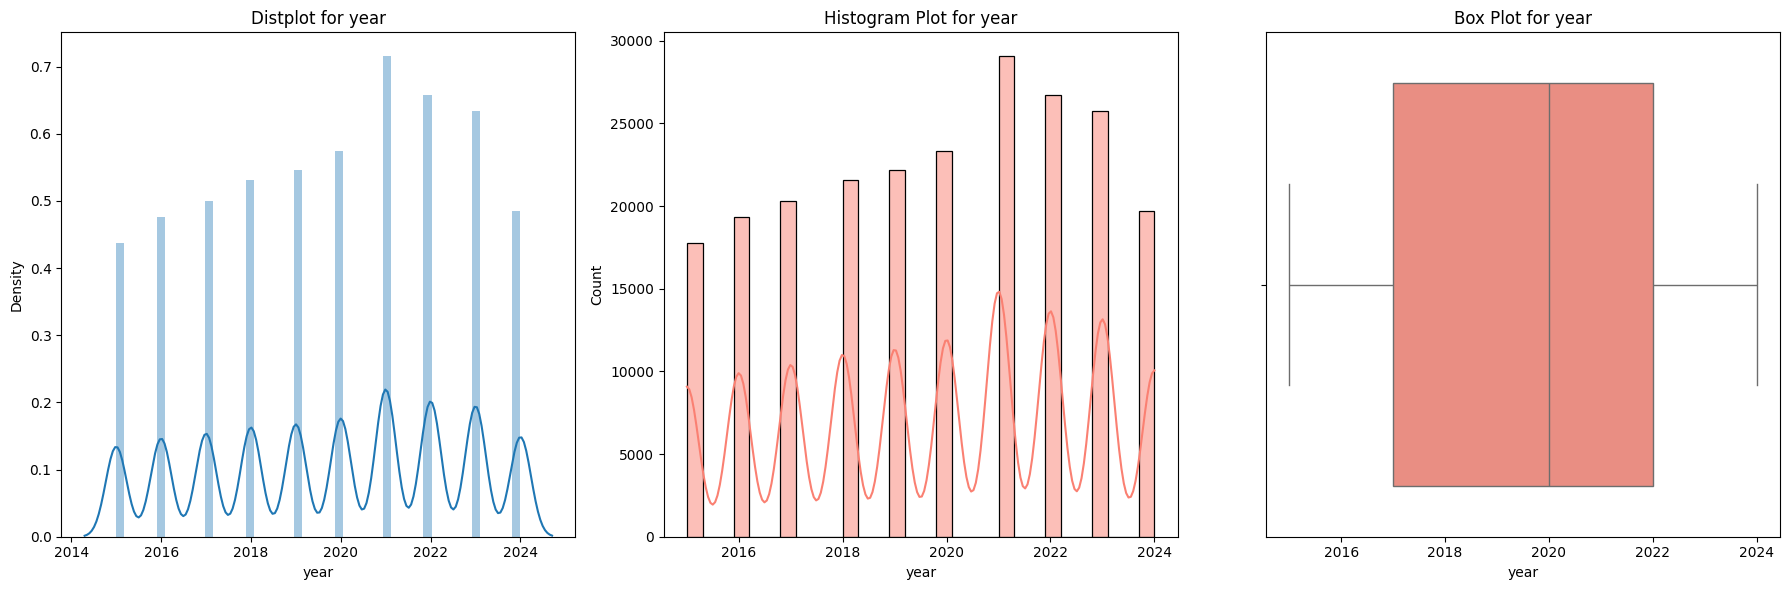

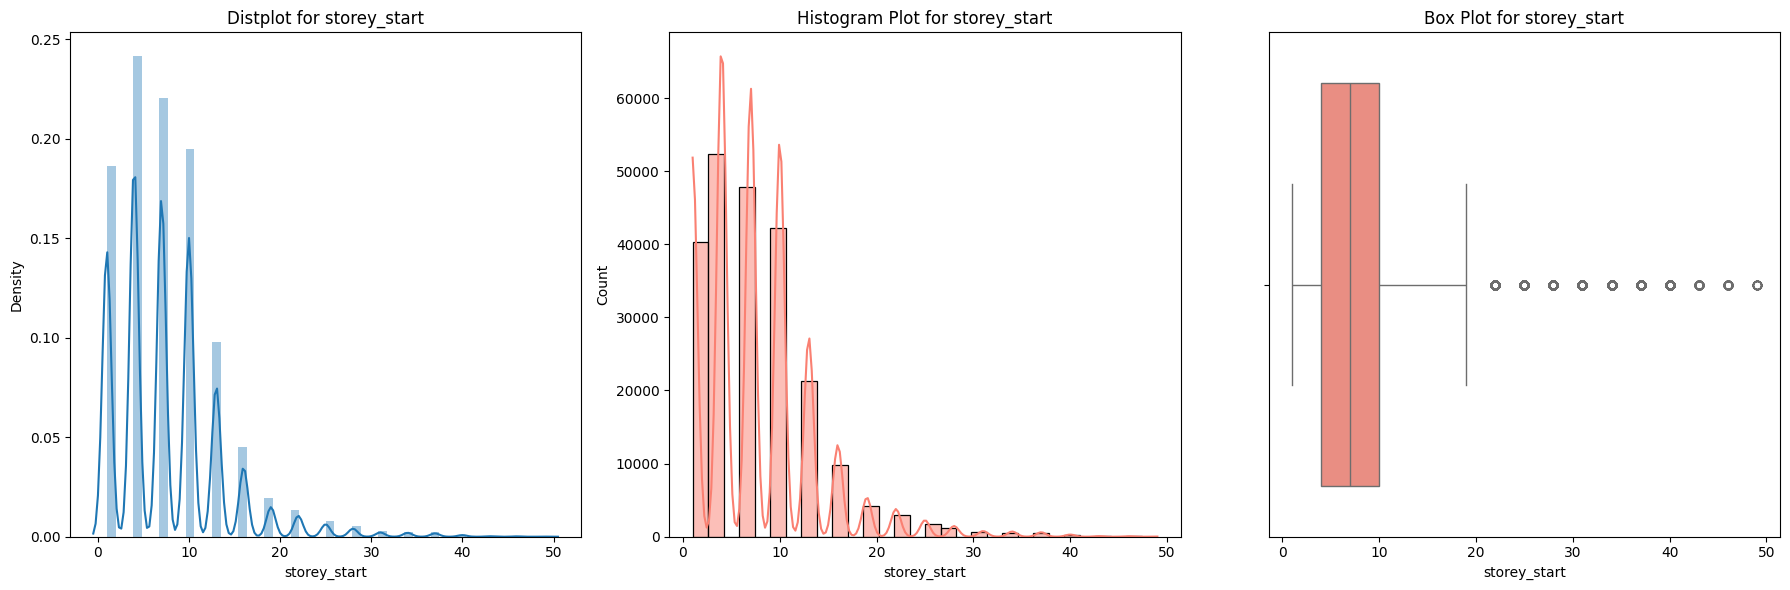

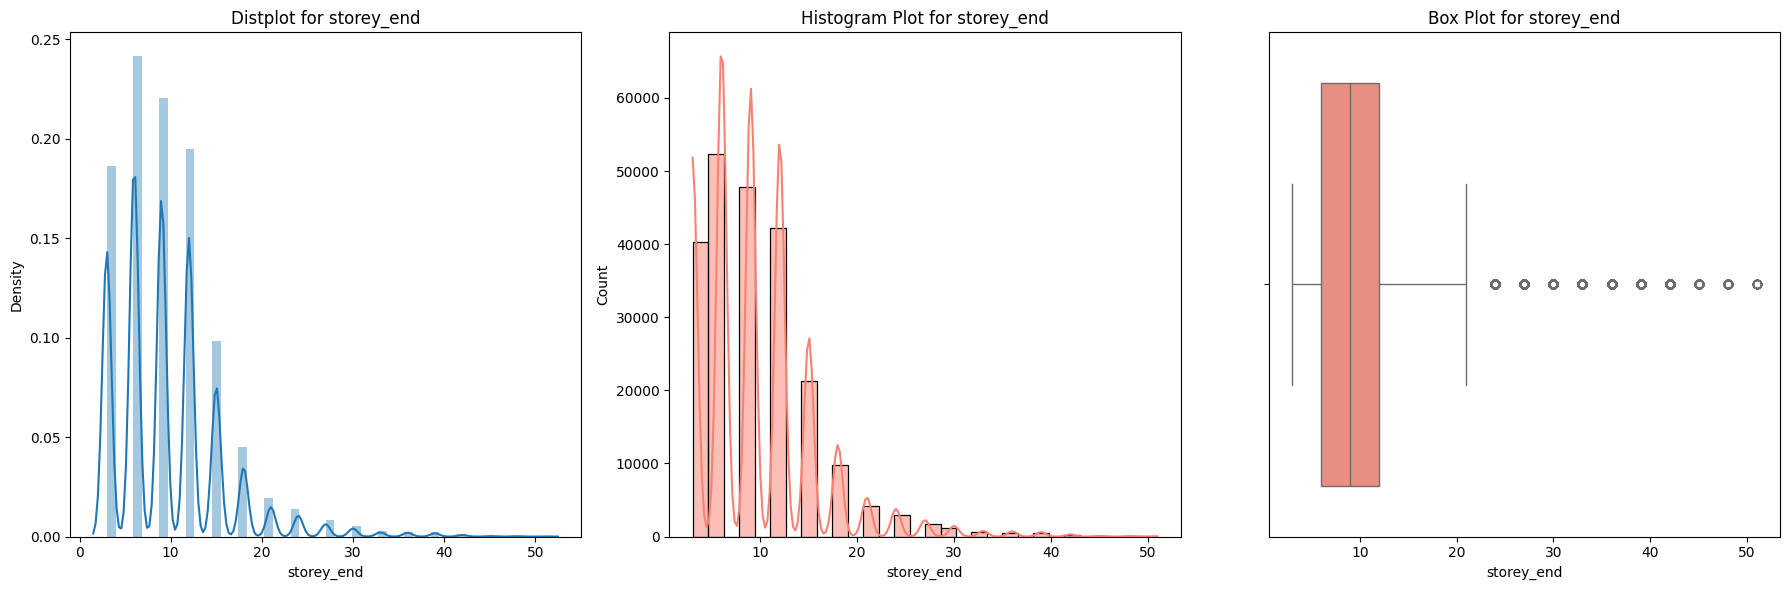

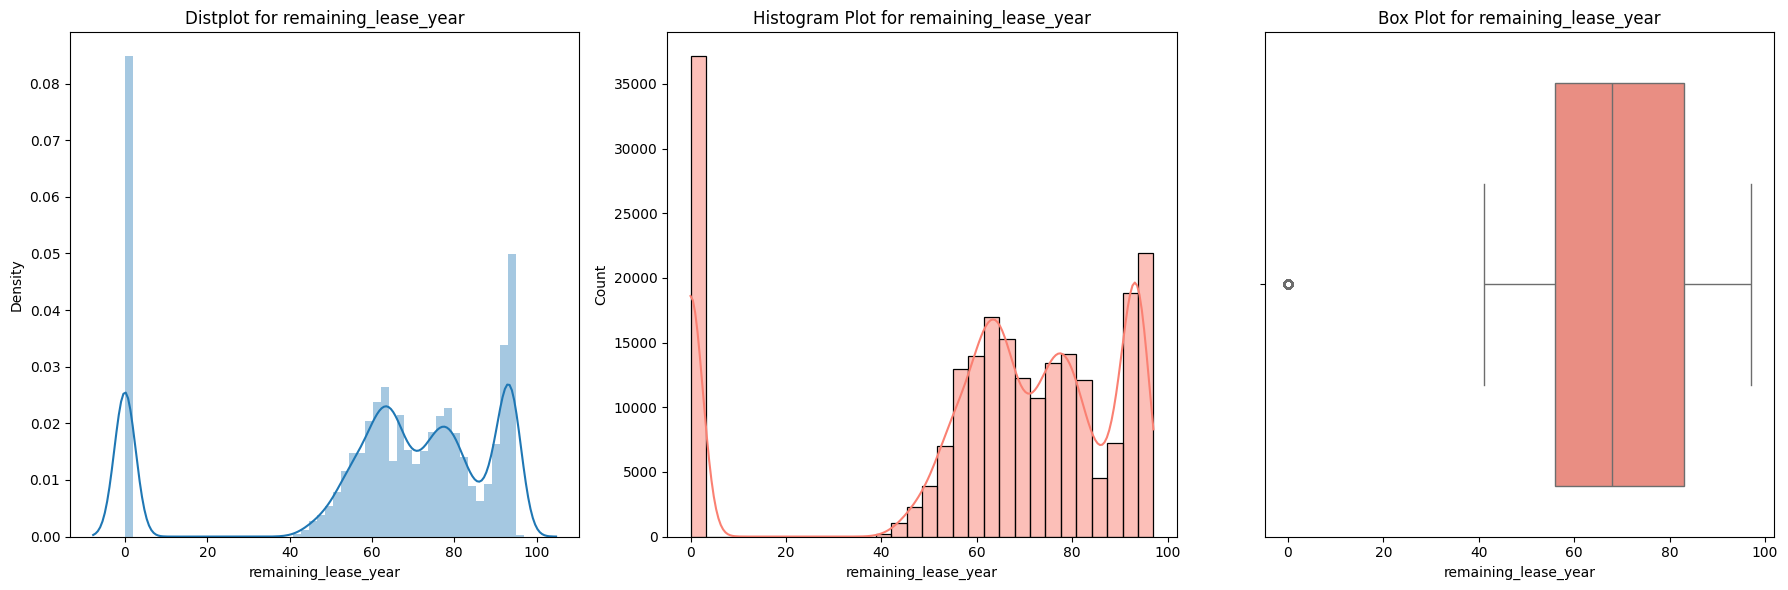

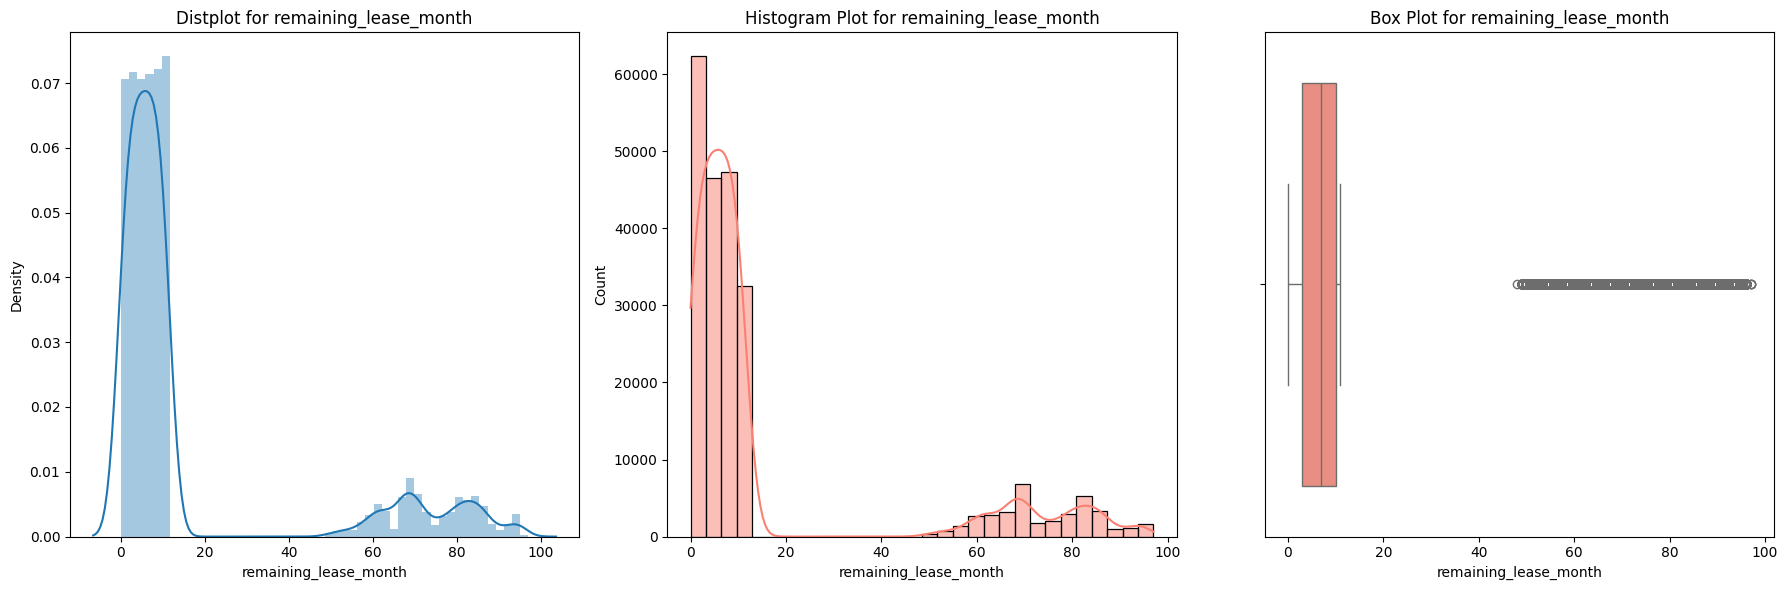

In [258]:
for i in df1_final.columns:
    plot(df1_final,i)

In [259]:
df1_final.describe().T

,count,mean,std,min,25%,50%,75%,max
town,225686.0,13.890388,7.955924,0.0,8.0,14.0,21.0,25.0
flat_type,225686.0,3.118714,0.919570,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,225686.0,97.072857,24.070475,31.0,81.0,93.0,112.0,366.7
flat_model,225686.0,8.686587,3.641509,0.0,5.0,8.0,12.0,20.0
lease_commence_date,225686.0,1995.247663,13.749508,1966.0,1985.0,1995.0,2005.0,2020.0
resale_price,225686.0,491951.412863,171070.992644,140000.0,365000.0,460000.0,585000.0,1588000.0
year,225686.0,2019.760136,2.756565,2015.0,2017.0,2020.0,2022.0,2024.0
storey_start,225686.0,7.661064,5.846841,1.0,4.0,7.0,10.0,49.0
storey_end,225686.0,9.661064,5.846841,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,225686.0,61.892293,30.302334,0.0,56.0,68.0,83.0,97.0


In [260]:
# some of the columns are skewed columns
df1_final['storey_start'] = np.log(df1_final['storey_start'])
df1_final['storey_end'] = np.log(df1_final['storey_end'])
df1_final['resale_price'] = np.log(df1_final['resale_price'])


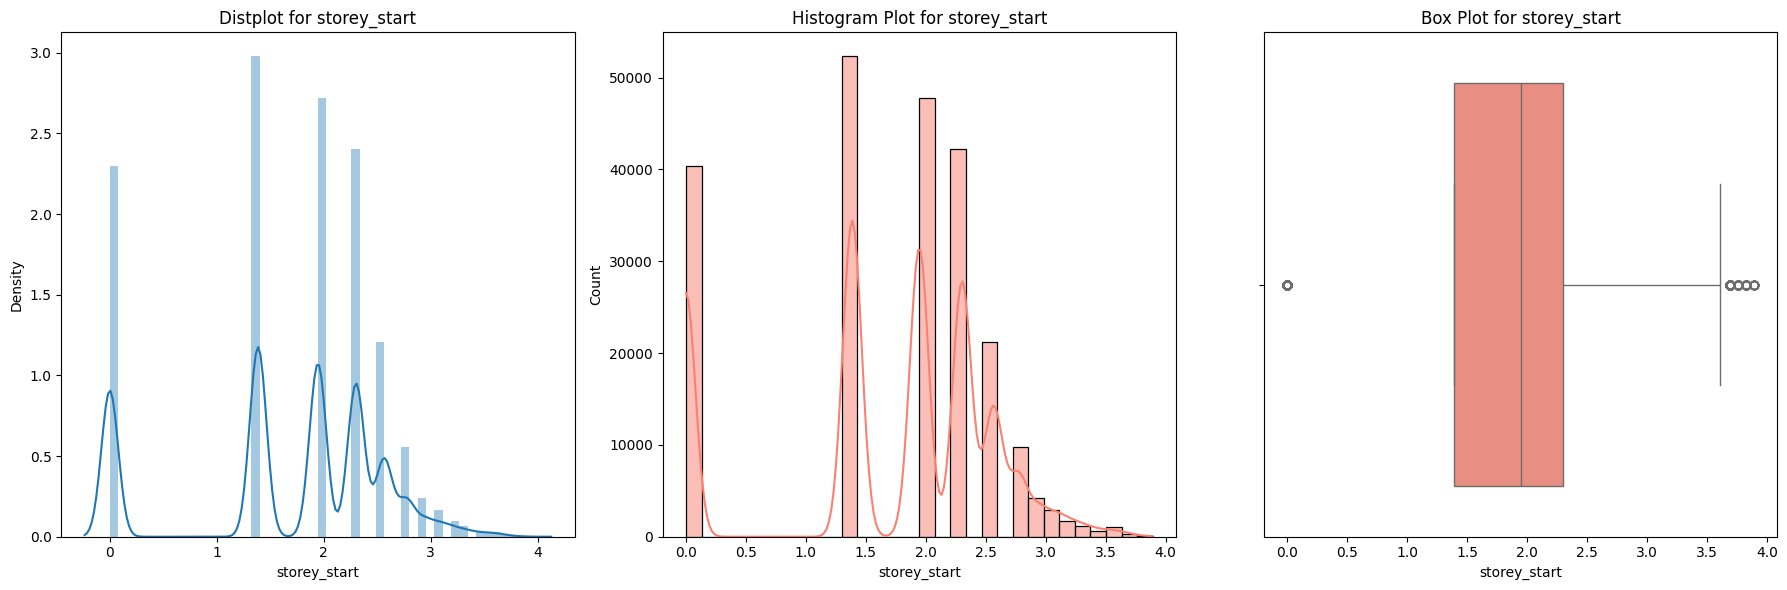

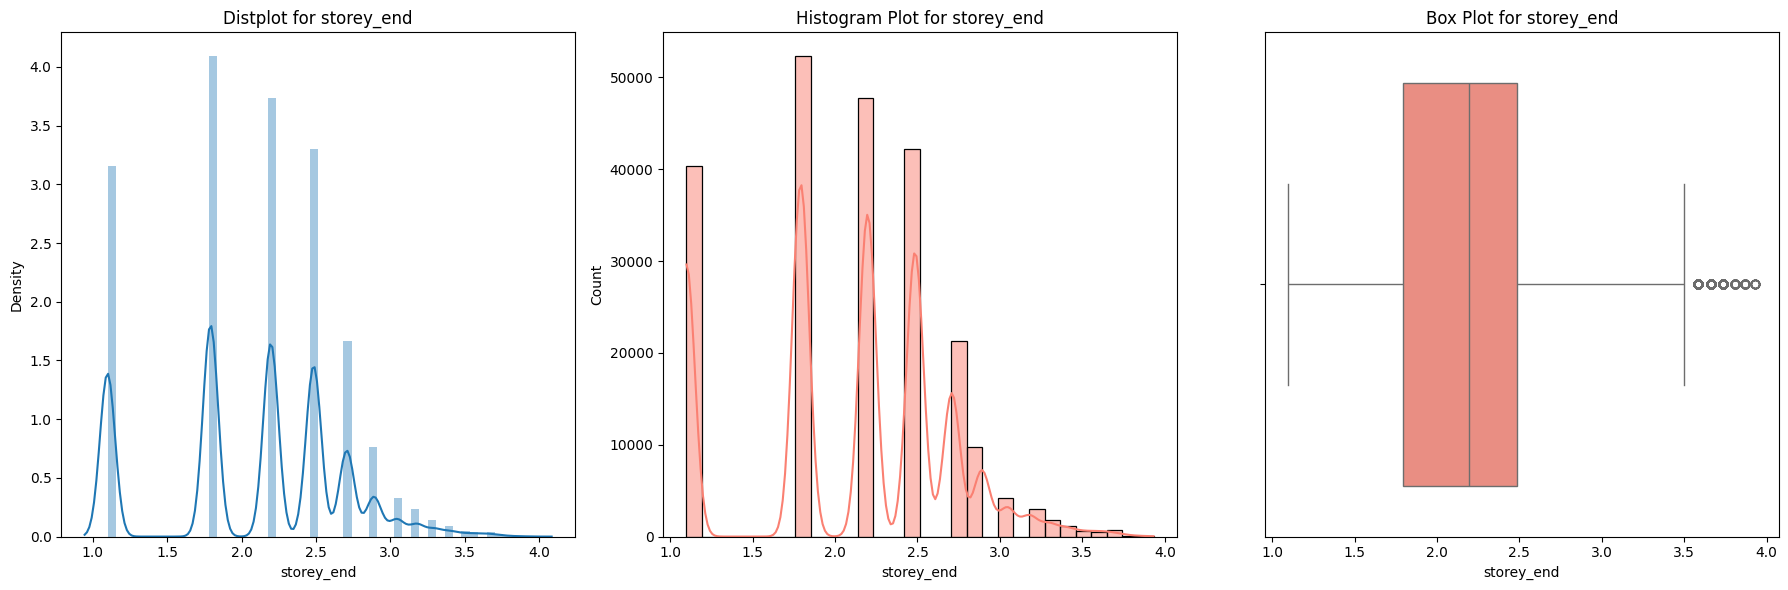

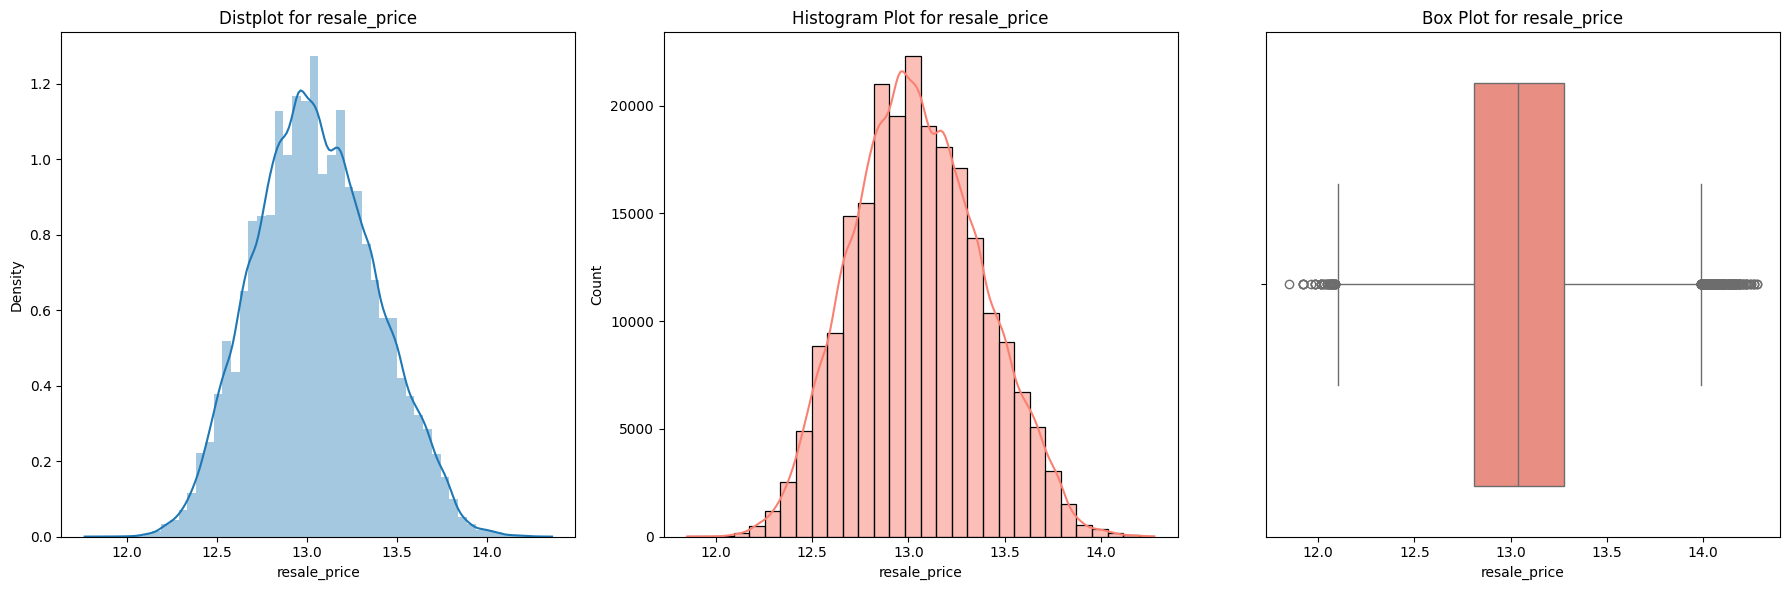

In [261]:
skewed_columns = ['storey_start','storey_end','resale_price']
for i in skewed_columns:
    plot(df1_final,i)

In [262]:
# here there are some of the columns are outliers
# outliers columns are - floor_area_sqm,resale_price,storey_start,storey_end,remaining_lease_year,remaining_lease_month
# using IQR method

def outlier_column(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    
    upper_threshold = q3+(1.5*iqr)
    lower_threshold = q1-(1.5*iqr)
    
    df[column] = df[column].clip(lower_threshold,upper_threshold)
    

In [263]:
outlier_columns = ['floor_area_sqm','resale_price','storey_start','storey_end','remaining_lease_year','remaining_lease_month']
for i in outlier_columns:
    outlier_column(df1_final,i)

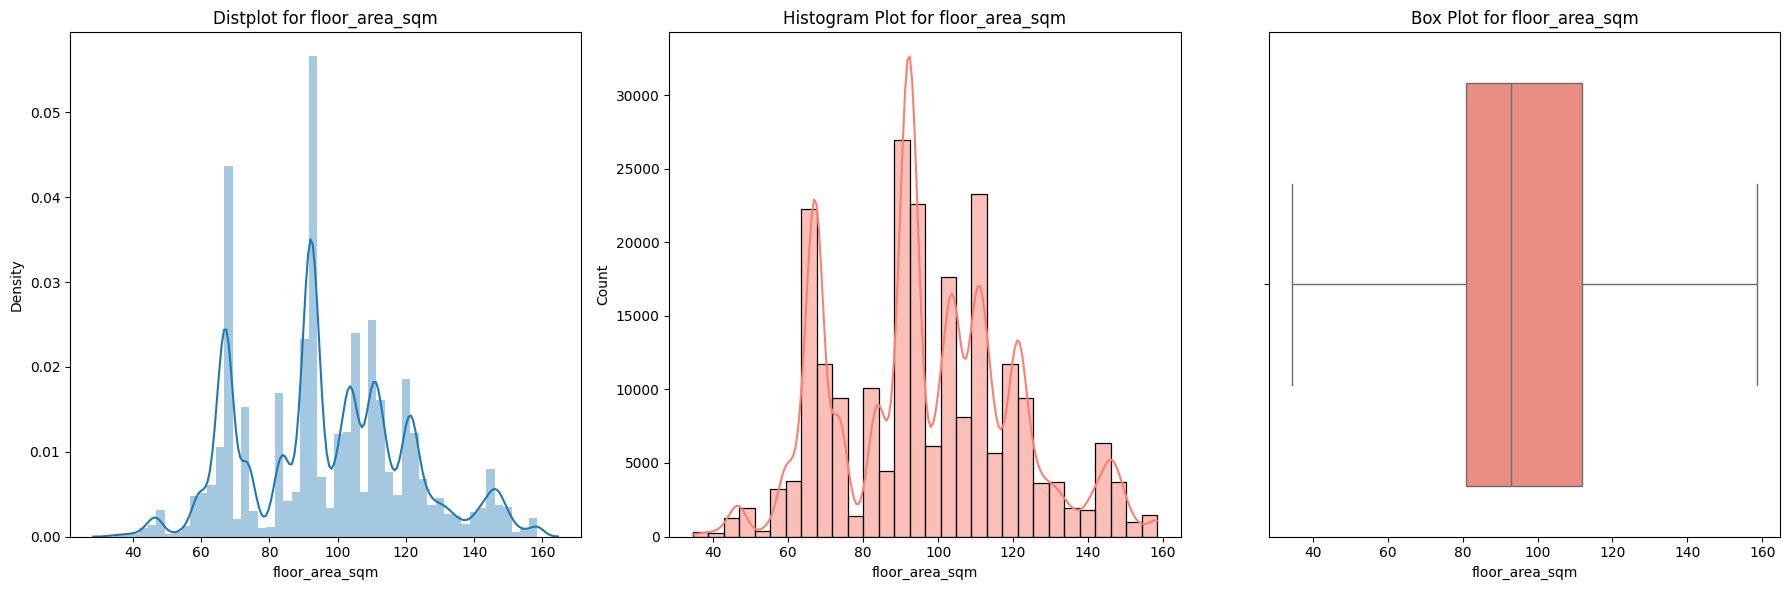

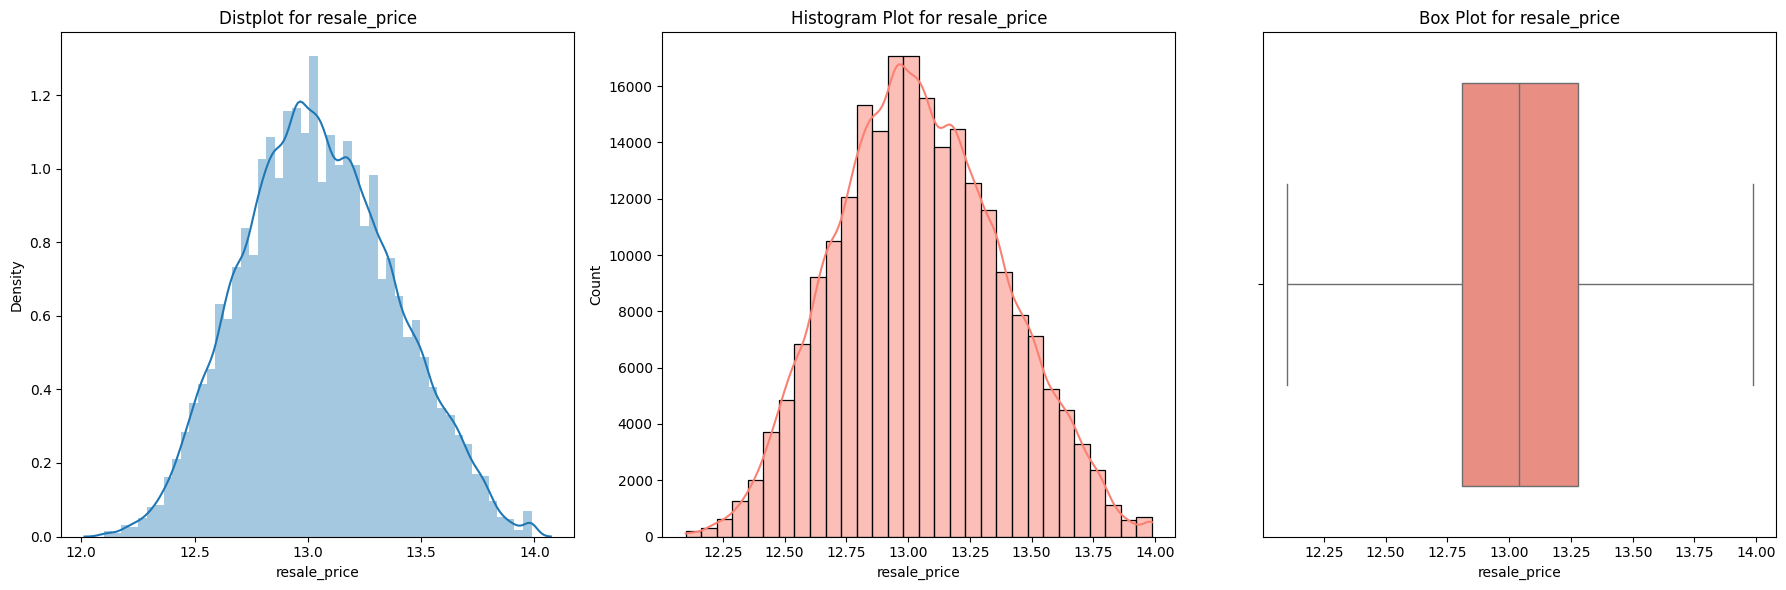

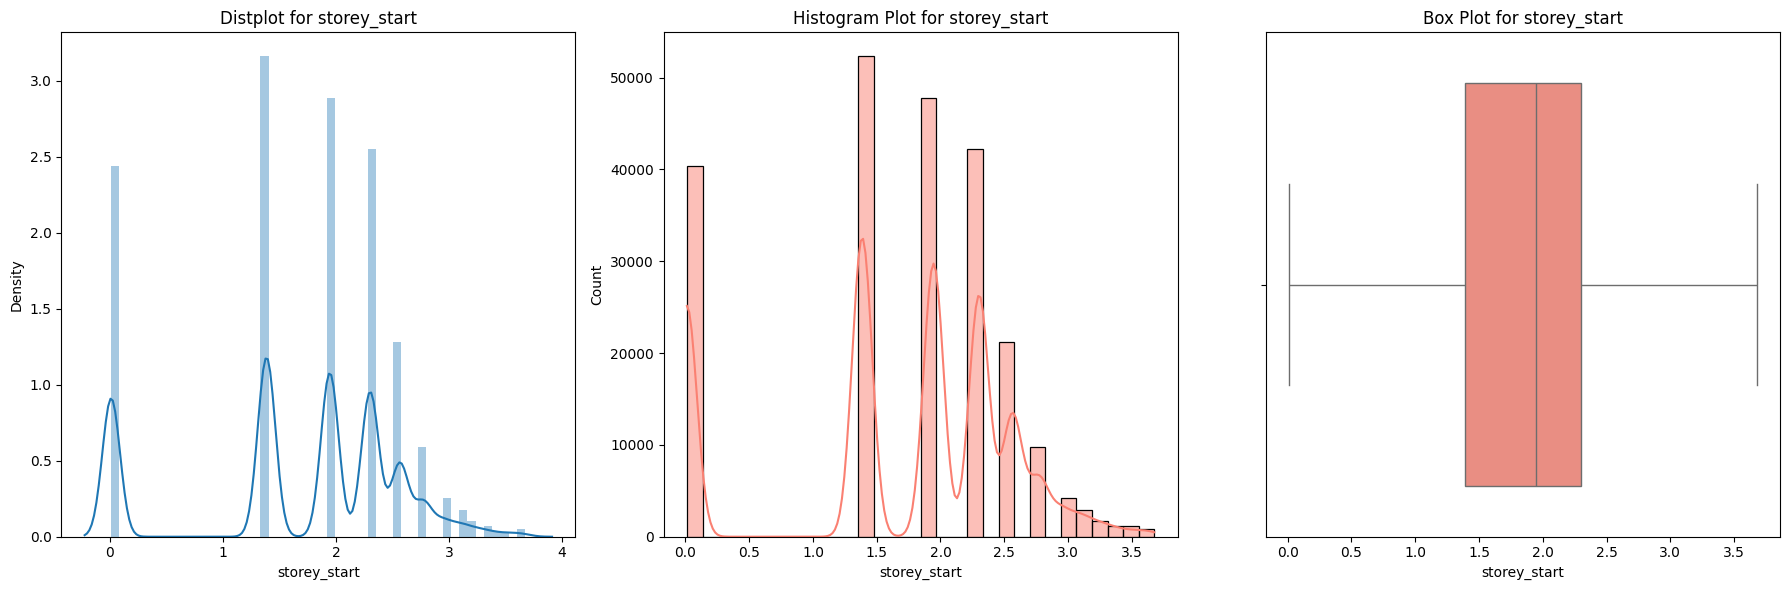

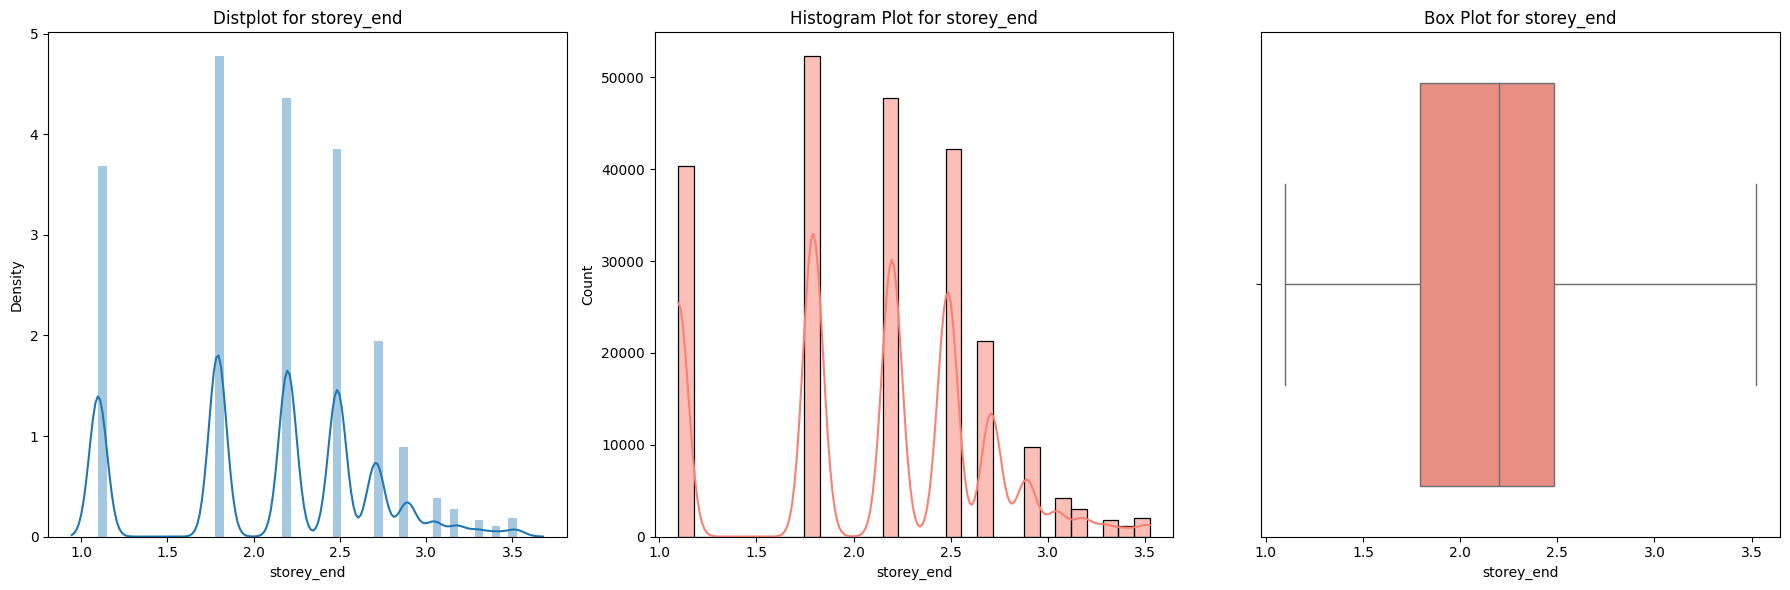

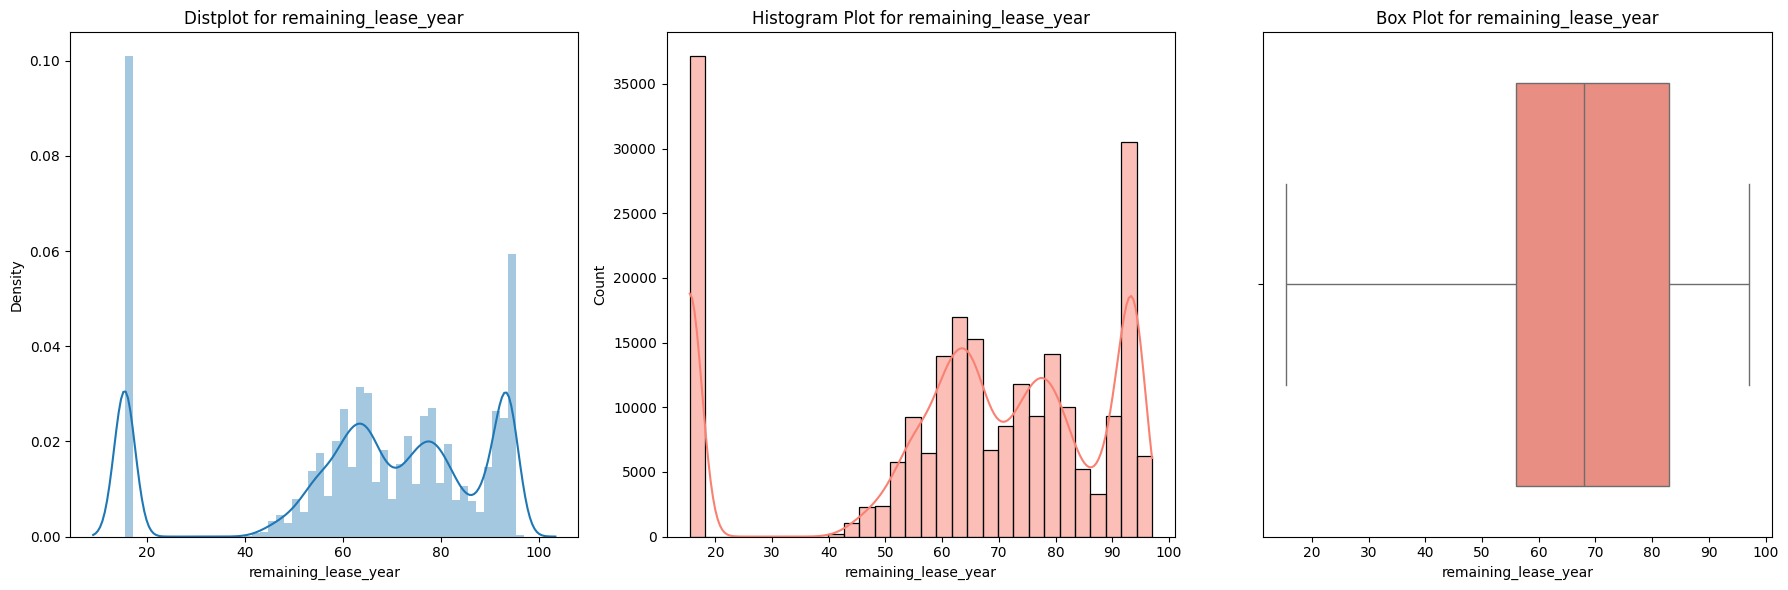

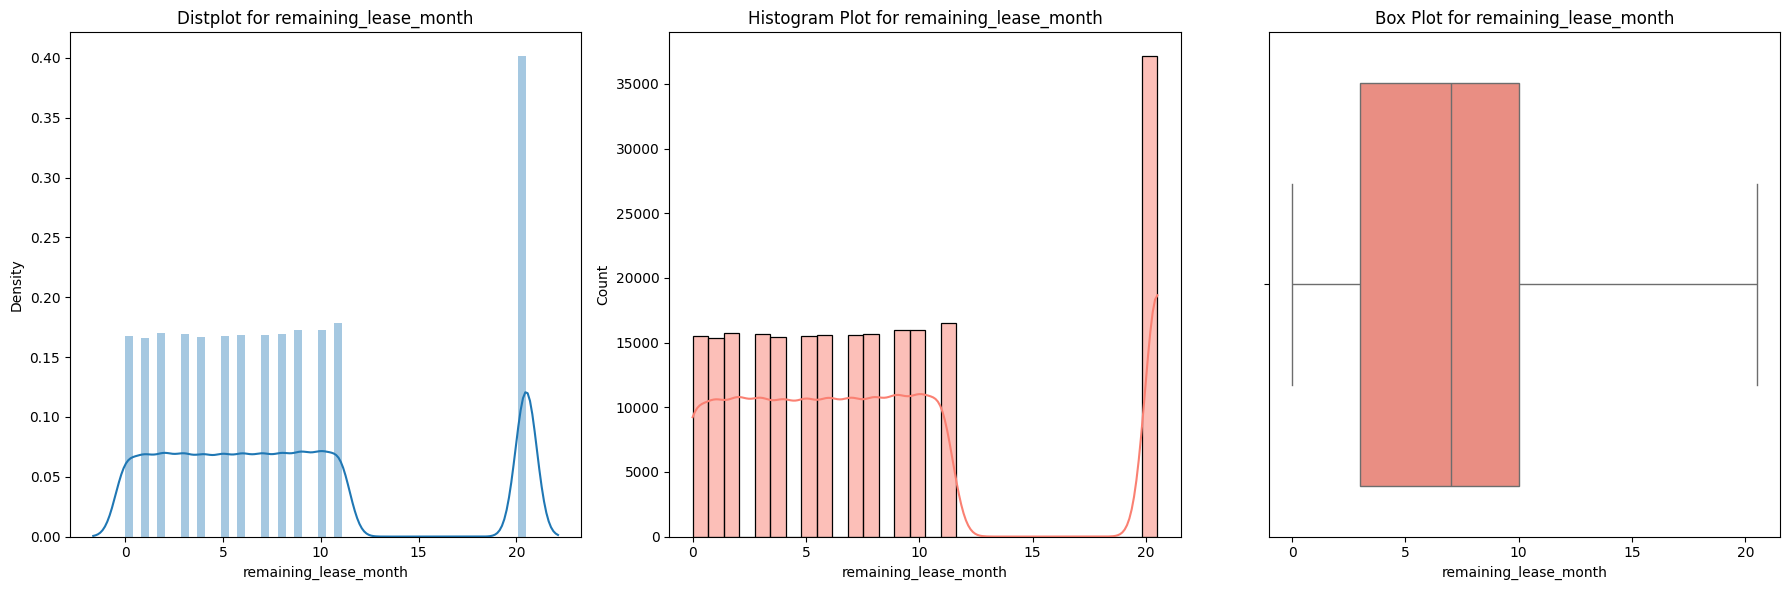

In [264]:
for j in outlier_columns:
    plot(df1_final,j)

In [265]:
df1_final.describe().T

,count,mean,std,min,25%,50%,75%,max
town,225686.0,13.890388,7.955924,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,225686.0,3.118714,0.919570,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,225686.0,96.998368,23.829452,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,225686.0,8.686587,3.641509,0.000000,5.000000,8.000000,12.000000,20.000000
lease_commence_date,225686.0,1995.247663,13.749508,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000
resale_price,225686.0,13.049509,0.333566,12.100081,12.807653,13.038982,13.279367,13.986939
year,225686.0,2019.760136,2.756565,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
storey_start,225686.0,1.695680,0.921320,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,225686.0,2.093519,0.601605,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,225686.0,64.442294,25.211147,15.500000,56.000000,68.000000,83.000000,97.000000


In [267]:
# Dataset is ready to train on machine learning model
# we can go for regression model
# prediction column -- resale_price	
# importing the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [268]:
def model(df,algorithm):
    
    x=df.drop(columns=['resale_price'])
    y = df['resale_price']
    
    # train test and split the data
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=40)
    
    # fitting the model
    model = algorithm().fit(X_train,Y_train)
    
    # predict the model
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    # Mean Squared Error(MSE)
    train_mse = mean_squared_error(Y_train,Y_pred_train)
    test_mse = mean_squared_error(Y_test,Y_pred_test)
    
    # Root mean squared Erro(RMSE)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    # Mean Absolute Error (MAE)
    train_mae = mean_absolute_error(Y_train,Y_pred_train)
    test_mae = mean_absolute_error(Y_test,Y_pred_test)
    
    # R-squared (R²) Score
    train_r2 = r2_score(Y_train, Y_pred_train)
    test_r2 = r2_score(Y_test, Y_pred_test)
    
    # Create a dictionary for training metrics
    metrics_train = {
        "Data": "Train Data",                # Label for training data
        "Name": algorithm.__name__,          # Name of the algorithm
        "R2_score": train_r2,                # R² score for training data
        "Mean_squared_error": train_mse,     # MSE for training data
        "Root_mean_squared_error": train_rmse, # RMSE for training data
        "Mean_absolute_error": train_mae     # MAE for training data
    }

    # Create a dictionary for test metrics
    metrics_test = {
        "Data": "Test Data",                 # Label for test data
        "Name": algorithm.__name__,          # Name of the algorithm
        "R2_score": test_r2,                 # R² score for test data
        "Mean_squared_error": test_mse,      # MSE for test data
        "Root_mean_squared_error": test_rmse, # RMSE for test data
        "Mean_absolute_error": test_mae      # MAE for test data
    }

    # Print the metrics for training and test data
    print(metrics_train)
    print(metrics_test)
    print("")  #  for better readability


In [269]:
model(df1_final,LinearRegression)
model(df1_final,DecisionTreeRegressor)
model(df1_final,RandomForestRegressor)
model(df1_final,XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6901824319907177, 'Mean_squared_error': np.float64(0.03447691534360614), 'Root_mean_squared_error': np.float64(0.18567960400541073), 'Mean_absolute_error': np.float64(0.1448736353668876)}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6891700940087417, 'Mean_squared_error': np.float64(0.034564735305694615), 'Root_mean_squared_error': np.float64(0.18591593612623586), 'Mean_absolute_error': np.float64(0.1451418437341757)}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9956762476210366, 'Mean_squared_error': np.float64(0.0004811529755852078), 'Root_mean_squared_error': np.float64(0.021935199465361783), 'Mean_absolute_error': np.float64(0.008086584243607454)}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9280429152870886, 'Mean_squared_error': np.float64(0.008001731939336544), 'Root_mean_squared_error': np.float64(0.08945240041126087), 'Mean_absolute_error': np.f

In [270]:
df1_final.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,0,2.0,60.0,5.0,1986,12.449019,2015,1.945910,2.197225,15.5,20.5
1,0,2.0,68.0,12.0,1981,12.524526,2015,0.011858,1.098612,15.5,20.5
2,0,2.0,69.0,12.0,1980,12.560244,2015,0.011858,1.098612,15.5,20.5
3,0,2.0,68.0,12.0,1979,12.577636,2015,0.011858,1.098612,15.5,20.5
4,0,2.0,68.0,12.0,1980,12.577636,2015,1.945910,2.197225,15.5,20.5


In [271]:
# Here randomforest regressor has bee chosed

x= df1_final.drop(columns=["resale_price"])
y= df1_final["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model= RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9560028245230126, 'Mean_squared_error': np.float64(0.004863389131389513), 'Root_mean_squared_error': np.float64(0.06973800349443274), 'Mean_absolute_error': np.float64(0.05120840022831114)}


In [272]:
df1_final.iloc[10500]

town                       24.000000
flat_type                   2.000000
floor_area_sqm             67.000000
flat_model                  8.000000
lease_commence_date      2015.000000
resale_price               12.700769
year                     2021.000000
storey_start                1.945910
storey_end                  2.197225
remaining_lease_year       93.000000
remaining_lease_month       8.000000
Name: 10500, dtype: float64

In [273]:
# pickling
with open("Singapore_Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model,f)

In [274]:
# Unpickling: Load the model from the file
with open("Singapore_Resale_Flat_Prices_Model_1.pkl", "rb") as f1:
    loaded_model = pickle.load(f1)



In [278]:
# Now you can use loaded_model as you would use your original model

data = np.array([[24,2,67,8,2015,2021,1,2,93,8]])
y_pred_01 = loaded_model.predict(data)
y_pred_01[0]


np.float64(12.73455425882719)

In [279]:
np.exp(12.73455425882719)

np.float64(339270.92596873984)

In [276]:
df1_final.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,storey_start,storey_end,remaining_lease_year,remaining_lease_month
0,0,2.0,60.0,5.0,1986,12.449019,2015,1.945910,2.197225,15.5,20.5
1,0,2.0,68.0,12.0,1981,12.524526,2015,0.011858,1.098612,15.5,20.5
2,0,2.0,69.0,12.0,1980,12.560244,2015,0.011858,1.098612,15.5,20.5
3,0,2.0,68.0,12.0,1979,12.577636,2015,0.011858,1.098612,15.5,20.5
4,0,2.0,68.0,12.0,1980,12.577636,2015,1.945910,2.197225,15.5,20.5


In [277]:
df1_final['remaining_lease_month'].min()

np.float64(0.0)